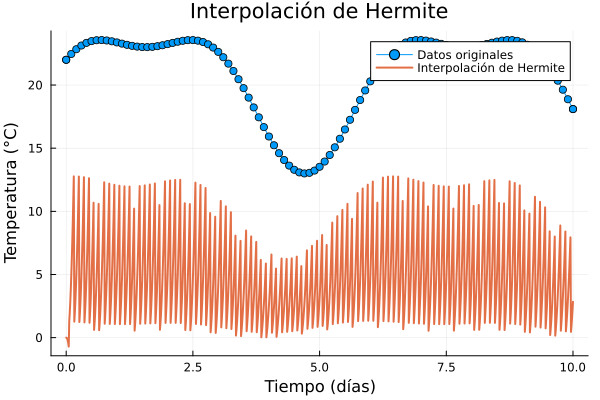

In [2]:
using Plots

# Generamos los datos de temperaturas diarias
tiempos = 0:0.1:10 # Vector de tiempos
temperaturas = 20.0.+ 5*sin.(tiempos).+ 2*cos.(2*tiempos) # Vector de temperaturas

# Calculamos las derivadas aproximadas
dt = 0.1
derivadas = diff(temperaturas)./dt

# Agregamos el primer y último punto para que la interpolación sea más precisa
tiempos = [tiempos[1]; tiempos; tiempos[end]]
temperaturas = [temperaturas[1]; temperaturas; temperaturas[end]]
derivadas = [derivadas[1]; derivadas; derivadas[end]]

# Definimos la función de interpolación de Hermite
function hermite_interpolation(tiempos, temperaturas, derivadas, x)
    idx = 1
    min_diff = abs(tiempos[1] - x)
    for i in 2:length(tiempos)
        diff = abs(tiempos[i] - x)
        if diff < min_diff
            min_diff = diff
            idx = i
        end
    end

    # Calcula los coeficientes de la interpolación de Hermite
    h00 = (tiempos[idx] - x)^2 * (tiempos[idx] - x - dt) / (dt^2)
    h10 = (tiempos[idx] - x)^2 / dt
    if idx > 1
        h01 = (x - tiempos[idx-1])^2 * (x - tiempos[idx-1] + dt) / (dt^2)
        h11 = (x - tiempos[idx-1])^2 / dt
        temp_interp = h00 * temperaturas[idx-1] + h10 * derivadas[idx-1] + h01 * temperaturas[idx] + h11 * derivadas[idx]
    else
        h01 = 0
        h11 = 0
        temp_interp = h00 * temperaturas[idx] + h10 * derivadas[idx]
    end

    return temp_interp
end

# Generamos los puntos de interpolación
x_interp = 0:0.01:10

# Interpolamos la temperatura en los puntos de interpolación
temp_interp = [hermite_interpolation(tiempos, temperaturas, derivadas, x) for x in x_interp]

# Graficamos los datos originales y la interpolación de Hermite
plot(tiempos, temperaturas, label="Datos originales", marker=:circle)
plot!(x_interp, temp_interp, label="Interpolación de Hermite", linewidth=2)
xlabel!("Tiempo (días)")
ylabel!("Temperatura (°C)")
title!("Interpolación de Hermite")